In [1]:
# Bibliotecas necessárias para o projeto.
import numpy
import pandas
import missingno
import sys
import scipy
import sklearn

# Biblioteca de visualização
import seaborn
import matplotlib.pyplot

# Print das versões dos pacotes
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.version))
print('Pandas: {}'.format(pandas.__version__))
print('Missingno: {}'.format(missingno.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'C:\\Users\\renat\\Anaconda3\\lib\\site-packages\\numpy\\version.py'>
Pandas: 0.23.0
Missingno: 0.4.1
Scipy: 1.1.0
Sklearn: 0.19.1
Seaborn: 0.8.1
Matplotlib: 2.2.2


In [2]:
# Importação das bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import pandas_profiling as pp
import missingno as msno
import sys
import scipy
import sklearn

# Importação da biblioteca de visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Exibição amigável para notebooks
%matplotlib inline

C:\Users\renat\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\renat\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\renat\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\renat\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\renat\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\renat\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\ren

In [3]:
#Carga da base de dados
fonte_pd_1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
fonte_pd_2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

#Foram utilizados os dados da fonte_pd_1
colunas = ['id','Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',     
   'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli','Mitoses', 'Class']


#Sabemos que há missings na base pelas informações contidas no site. Entretanto, o missing contém "?", que não é um padrão do Python. Assim, será necessário identificar o valor de missing antes.
missing_values = ["?"]

df=pd.read_csv(fonte_pd_1, names=colunas, na_values = missing_values)

#Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [4]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_Cell_Size           699 non-null int64
Uniformity_Cell_Shape          699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [5]:
display(df.head(n=5))

,id,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
#Verifica existencia de valores nulos
df.isnull().values.any()

True

In [7]:
#Mostra colunas com todos os valores nulos
df.columns[df.isnull().all()]

Index([], dtype='object')

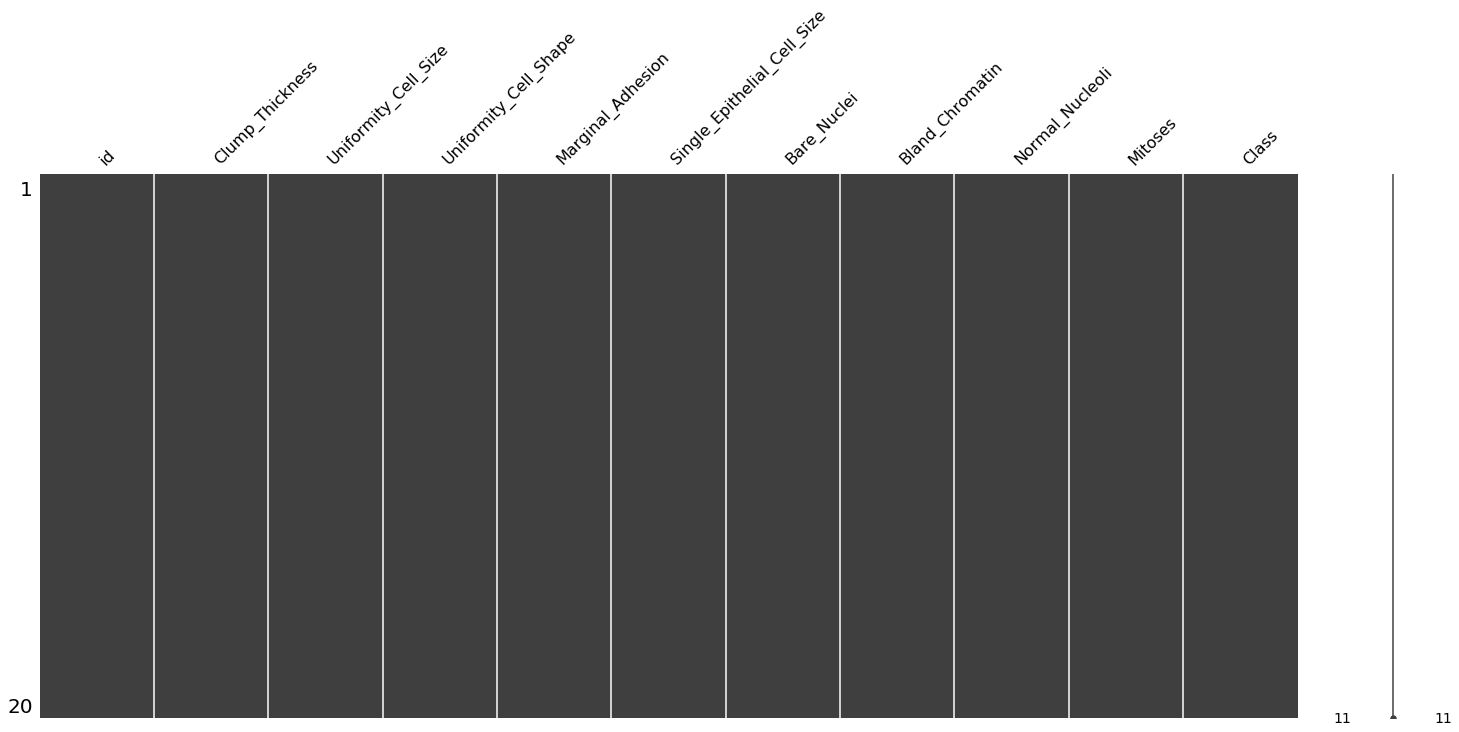

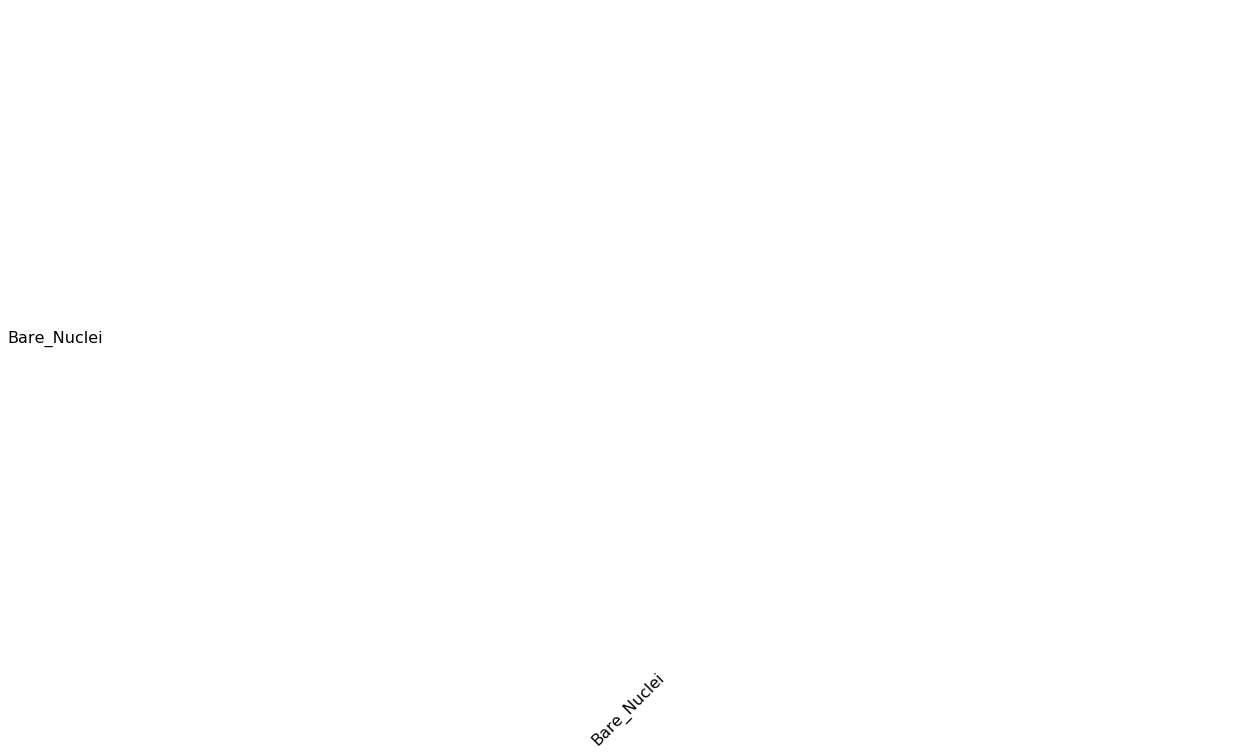

In [8]:
#Existencia de missings nas colunas (espaços em branco indicam existência de missings)
msno.matrix(df.sample(20))

#Quão forte presença ou ausência de uma variável afeta presença de outra (só aparecem as variáveis que contém missings)
msno.heatmap(df)

In [9]:
#Gerando reporte completo sobre o dataset, após primeiros tratamentos:
pfr=pp.ProfileReport(df)
pfr

#Caso necessite gerar um reporte em html, inserir codigo abaixo:
#pfr.to_file(r"C:\Nome_Diretorio\Reporte_Completo_df.html")

Number of variables,11
Number of observations,699
Total Missing (%),0.2%
Total size in memory,60.1 KiB
Average record size in memory,88.1 B
Numeric,9
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [10]:
#Substituição de missing por um valor
df.replace('?', -99999, inplace=True)
#Exclusão das linhas com valores missing
df.dropna(inplace=True)
#Exclusão de variável id, não necessária à análise:
df.drop(['id'],axis=1,inplace = True)
print(df.info(1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump_Thickness                683 non-null int64
Uniformity_Cell_Size           683 non-null int64
Uniformity_Cell_Shape          683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: float64(1), int64(9)
memory usage: 58.7 KB
None


In [11]:
#Resumo informações das colunas (df)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


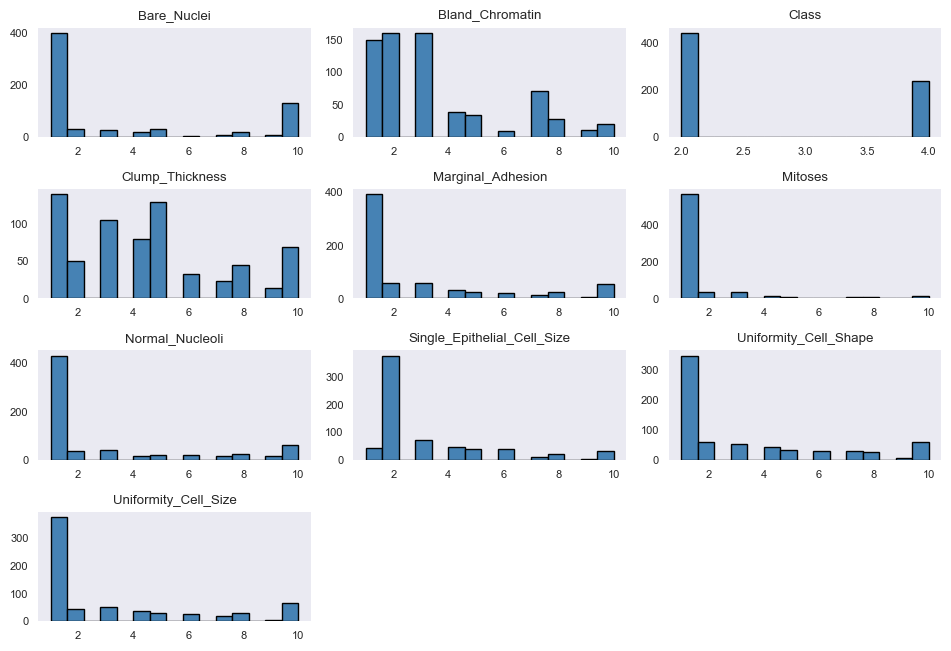

In [12]:
#Visualização dos dados (Histograma)
sns.set(font_scale=0.8)

#Histograma inicial para as colunas contendo valores numéricos:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

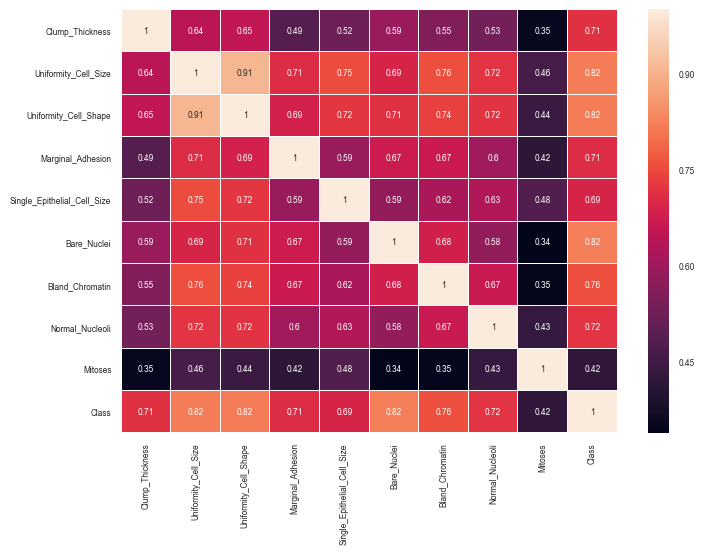

In [13]:
#Matriz de correlação entre atributos, para as colunas contendo valores numéricos:
import seaborn as sns
sns.set(font_scale=0.6)
sns.heatmap(df.corr(),linewidths=0.1, annot=True, annot_kws={"size":6})

In [14]:
# Número total de registros.
n_registros = len(df.index)

# Número de indivíduos com classe=4 (maligno)
n_maligno = len(df[df['Class']==4].index)

# Número de indivíduos com classe=2 (benigno)
n_benigno = len(df[df['Class']==2].index)

# TODO: Percentual de indivíduos com classe=4 (maligno)
perc_maligno = (n_maligno/n_registros)*100

# Exibindo os resultados
print ("Total registros: {:0,}".format(n_registros))
print ("Pacientes com classe=maligno: {:0,}".format(n_maligno))
print ("Pacientes com classe=benigno:: {:0,}".format(n_benigno))
print ("Percentual de pacientes com classe=maligno: {:.2f}%".format(perc_maligno))

Total registros: 683
Pacientes com classe=maligno: 239
Pacientes com classe=benigno:: 444
Percentual de pacientes com classe=maligno: 34.99%


In [15]:
# Divisão dos dados entre features e coluna alvo (Class)
class_raw = df['Class'] #valor do Y
features_raw = df.drop('Class', axis = 1) #valores X

In [16]:
#Agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os valores de X(atributos) e de Y (Class) entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    class_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 546 samples.
Testing set has 137 samples.


Avaliação da performance do modelo 
Nesta etapa, serão investigados 4 algoritmos diferentes, sendo determinado posteriormente qual deles é melhor para a modelagem dos dados. Três destes algoritmos serão algoritmos de aprendizado supervisionado e o quarto algoritmo será o naive predictor.

In [17]:
# Calculo do accuracy, precision e recall
accuracy = n_maligno / n_registros
recall = n_maligno / (n_maligno+0)
precision = n_maligno / (n_maligno+n_benigno)

#Cálculo do F-score utilizando a fórmula para o beta = 0.5 e os valores corretos de precision e recall.
fscore = (1+0.5*0.5)*(recall*precision)/((0.5*0.5 *precision)+recall)

# Resultados 
print ("Naive Predictor: [Score Acurácia: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Score Acurácia: 0.3499, F-score: 0.4022]


Implementação - Criação do Pipeline de Treinamento e Predição
Nesta etapa, serão criados os pipelines de treinamento e predição para treinar os modelos, além de performar predições nos dados de teste.

Implementação: Validação inicial do modelo

In [18]:
# Importação dos 3 modelos de aprendizado supervisionado da sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import KFold

#Definição dos modelos de treinamento
modelos=[]
modelos.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
modelos.append(('SVM', SVC()))

#Avaliação dos modelos
resultados=[]
modelos_avaliados=[]

for modelo_avaliado, modelo in modelos:
    kfold=model_selection.KFold(n_splits=10, random_state=100) 
    resultado_crossvalidation=model_selection.cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
    resultados.append(resultado_crossvalidation)
    modelos_avaliados.append(modelo_avaliado)
    print("%s: %f (%f)" % (modelo_avaliado, resultado_crossvalidation.mean(), resultado_crossvalidation.std() ))

KNN: 0.974377 (0.024814)
SVM: 0.954209 (0.022150)


In [19]:
#Predição em Machine Learning no dataset de testes
from sklearn.metrics import classification_report, accuracy_score
for modelo_avaliado, modelo in modelos:
    modelo.fit(X_train, y_train)
    predicoes=modelo.predict(X_test)
    print(modelo_avaliado, accuracy_score(y_test, predicoes))
    print(classification_report(y_test, predicoes))

KNN 0.9708029197080292
             precision    recall  f1-score   support

          2       0.99      0.97      0.98        87
          4       0.94      0.98      0.96        50

avg / total       0.97      0.97      0.97       137

SVM 0.9562043795620438
             precision    recall  f1-score   support

          2       1.00      0.93      0.96        87
          4       0.89      1.00      0.94        50

avg / total       0.96      0.96      0.96       137



In [20]:
#Inserir 9 itens de exemplo
exemplos = np.array([[5,2,1,2,1,2,7,2,9]])
exemplos = exemplos.reshape(len(exemplos),-1)


clf_A = SVC()
clf_A.fit(X_train, y_train)
acuracia_A=clf_A.score(X_test, y_test)
print('Acurácia SVC:', acuracia_A)

predicao_A=clf_A.predict (exemplos)
print('Classe Predita:',predicao_A)

clf_B = KNeighborsClassifier()
clf_B.fit(X_train, y_train)
acuracia_B=clf_B.score(X_test, y_test)
print('Acurácia SVC:',acuracia_B)

predicao_B=clf_B.predict (exemplos)
print('Classe Predita:',predicao_B)

Acurácia SVC: 0.9562043795620438
Classe Predita: [4]
Acurácia SVC: 0.9708029197080292
Classe Predita: [2]
